In [1]:
import fastf1 as ff1
from fastf1 import plotting
from fastf1 import utils

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

import numpy as np
import pandas as pd
ff1.Cache.enable_cache('C:/Users/benme/OneDrive - The Perse School/Formula 1')

In [2]:
quali = ff1.get_session(2022, 'Saudi Arabia', 'Q')
quali.load()

core           INFO 	Loading data for Saudi Arabian Grand Prix - Qualifying [v2.3.0]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['11', '16', '55', '1', '31', '63', '14', '77', '10', '20', '4', '3', '24', '47', '18', '44', '23', '27', '6', '22']


In [3]:
lec, per = 'LEC', 'PER'
lec_lap = quali.laps.pick_driver(lec).pick_fastest()
per_lap = quali.laps.pick_driver(per).pick_fastest()

lec_tel = lec_lap.get_telemetry().add_distance()
per_tel = per_lap.get_telemetry().add_distance()

In [4]:
lec_team = lec_lap['Team']
per_team = per_lap['Team']

In [5]:
delta_time, ref_tel, compare_tel = utils.delta_time(lec_lap, per_lap)

In [6]:
plot_size = (20, 20)
plot_title = f'{quali.event.year} - {quali.event.EventName} - {quali.name} - {lec} VS {per}'
plot_ratios = [1, 3, 2, 1, 1, 1, 1]
plot_filename = plot_title.replace(" ", "") +  '.png'

In [7]:
quali.event

RoundNumber                                                    2
Country                                             Saudi Arabia
Location                                                  Jeddah
OfficialEventName    FORMULA 1 STC SAUDI ARABIAN GRAND PRIX 2022
EventDate                                    2022-03-27 22:00:00
EventName                               Saudi Arabian Grand Prix
EventFormat                                         conventional
Session1                                              Practice 1
Session1Date                                 2022-03-25 17:00:00
Session2                                              Practice 2
Session2Date                                 2022-03-25 20:00:00
Session3                                              Practice 3
Session3Date                                 2022-03-26 17:00:00
Session4                                              Qualifying
Session4Date                                 2022-03-26 20:00:00
Session5                 

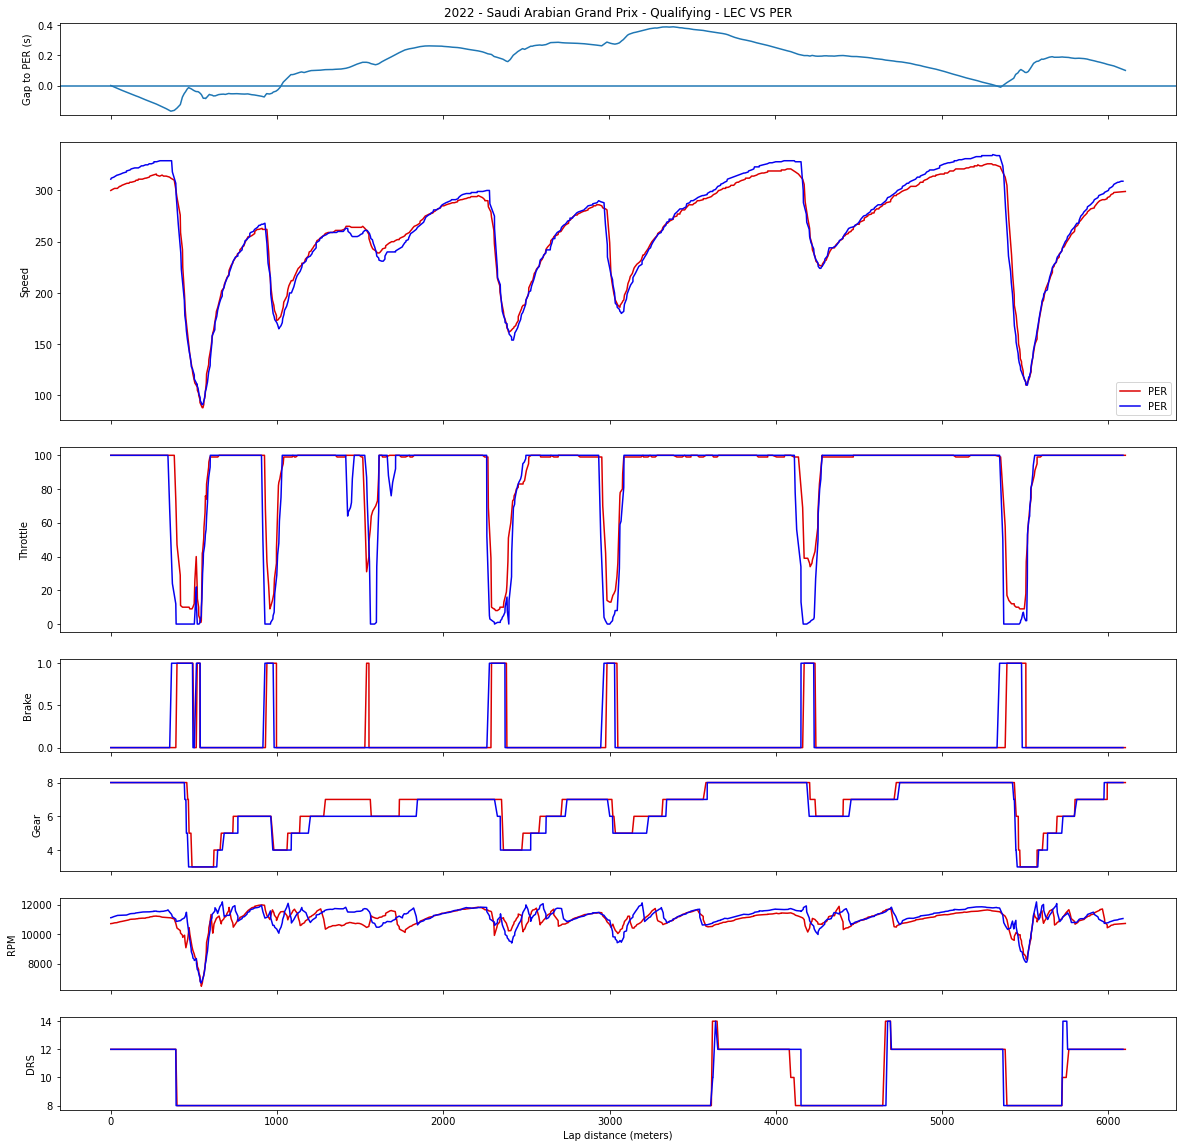

In [10]:
plt.rcParams['figure.figsize'] = plot_size

fig, ax = plt.subplots(7, gridspec_kw={'height_ratios': plot_ratios})

ax[0].title.set_text(plot_title)
# Delta line
ax[0].plot(ref_tel['Distance'], delta_time)
ax[0].axhline(0)
ax[0].set(ylabel=f"Gap to {per} (s)")

# Speed trace
ax[1].plot(lec_tel['Distance'], lec_tel['Speed'], label=per, color=ff1.plotting.team_color(lec_team))
ax[1].plot(per_tel['Distance'], per_tel['Speed'], label=per, color=ff1.plotting.team_color(per_team))
ax[1].set(ylabel='Speed')
ax[1].legend(loc="lower right")

# Throttle trace
ax[2].plot(lec_tel['Distance'], lec_tel['Throttle'], label=per, color=ff1.plotting.team_color(lec_team))
ax[2].plot(per_tel['Distance'], per_tel['Throttle'], label=per, color=ff1.plotting.team_color(per_team))
ax[2].set(ylabel='Throttle')

# Brake trace
ax[3].plot(lec_tel['Distance'], lec_tel['Brake'], label=per, color=ff1.plotting.team_color(lec_team))
ax[3].plot(per_tel['Distance'], per_tel['Brake'], label=per, color=ff1.plotting.team_color(per_team))
ax[3].set(ylabel='Brake')

# Gear trace
ax[4].plot(lec_tel['Distance'], lec_tel['nGear'], label=per, color=ff1.plotting.team_color(lec_team))
ax[4].plot(per_tel['Distance'], per_tel['nGear'], label=per, color=ff1.plotting.team_color(per_team))
ax[4].set(ylabel='Gear')

# RPM trace
ax[5].plot(lec_tel['Distance'], lec_tel['RPM'], label=per, color=ff1.plotting.team_color(lec_team))
ax[5].plot(per_tel['Distance'], per_tel['RPM'], label=per, color=ff1.plotting.team_color(per_team))
ax[5].set(ylabel='RPM')

# DRS trace
ax[6].plot(lec_tel['Distance'], lec_tel['DRS'], label=per, color=ff1.plotting.team_color(lec_team))
ax[6].plot(per_tel['Distance'], per_tel['DRS'], label=per, color=ff1.plotting.team_color(per_team))
ax[6].set(ylabel='DRS')
ax[6].set(xlabel='Lap distance (meters)')
for a in ax.flat:
    a.label_outer()

plt.savefig(plot_filename, dpi = 500)
plt.show()

In [14]:
weather = quali.weather_data

In [16]:
quali.weather_data

,Time,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed
0,0 days 00:00:21.102000,23.9,55.0,1013.5,False,26.1,324,3.0
1,0 days 00:01:21.159000,23.8,55.0,1013.5,False,26.0,334,3.4
2,0 days 00:02:21.101000,23.9,55.0,1013.5,False,26.0,329,3.5
3,0 days 00:03:21.119000,23.8,55.0,1013.7,False,26.0,345,3.0
4,0 days 00:04:21.117000,23.8,55.0,1013.7,False,26.0,349,2.5
...,...,...,...,...,...,...,...,...
138,0 days 02:18:21.385000,23.2,62.0,1014.7,False,24.7,337,3.0
139,0 days 02:19:21.399000,23.2,62.0,1014.7,False,24.7,338,2.7
140,0 days 02:20:21.392000,23.2,62.0,1014.7,False,24.7,331,2.4
141,0 days 02:21:21.388000,23.2,62.0,1014.9,False,24.7,350,3.2


In [15]:
plot_size = (20, 20)
plot_title = f'{quali.event.year} - {quali.event.EventName} - {quali.name} - Weather Data'
plot_ratios = [1, 1, 1, 1, 1]
plot_filename = plot_title.replace(" ", "") +  '.png'

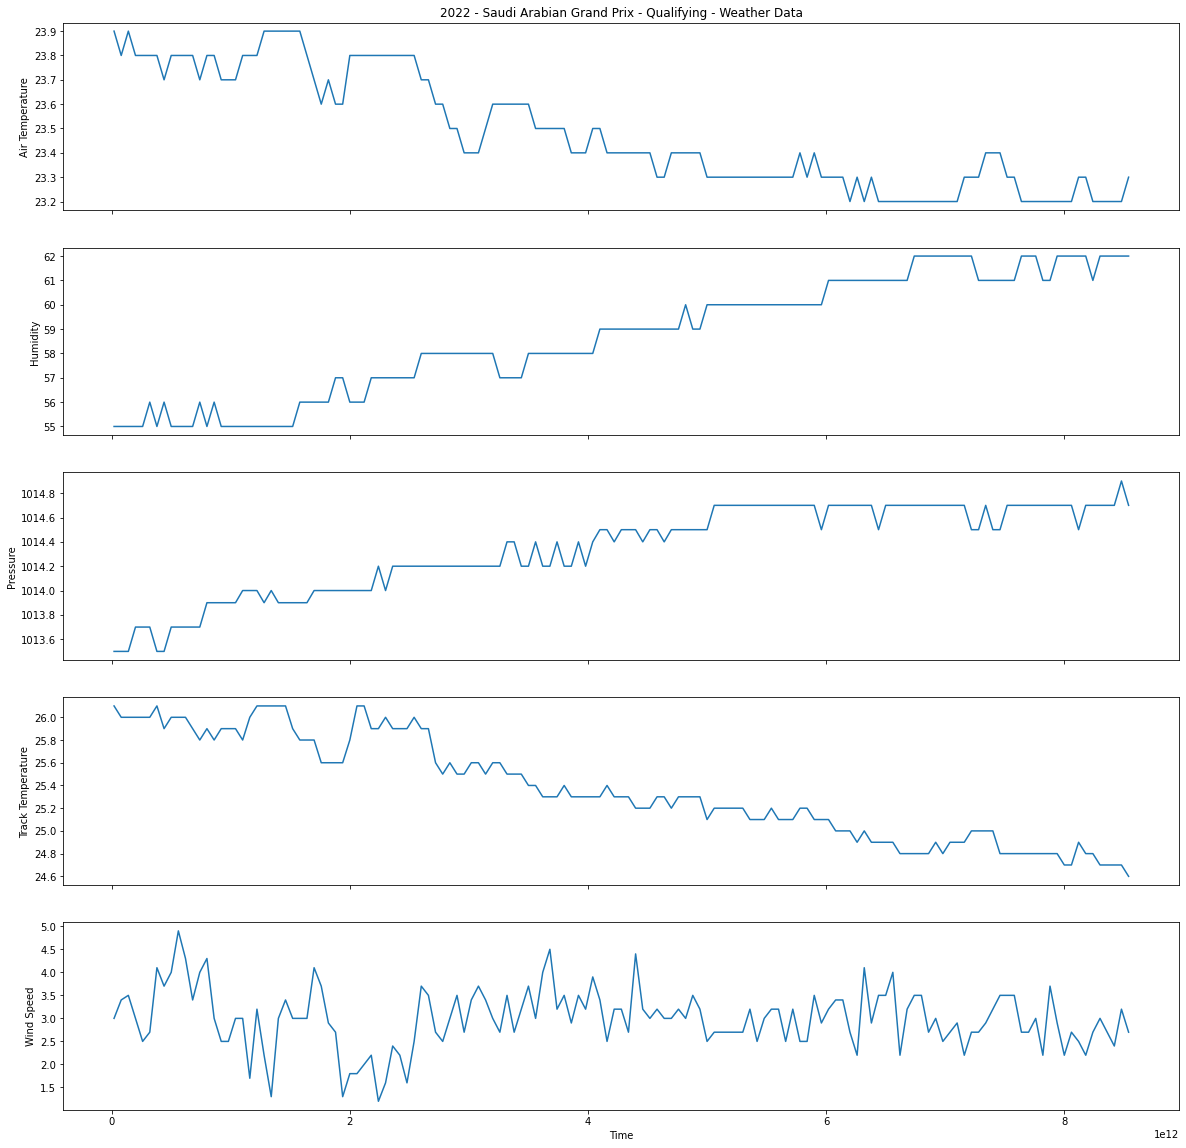

In [22]:
plt.rcParams['figure.figsize'] = plot_size
fig, ax = plt.subplots(5, gridspec_kw={'height_ratios': plot_ratios})

ax[0].title.set_text(plot_title)
ax[0].plot(weather['Time'], weather['AirTemp'])
ax[0].set(ylabel='Air Temperature')

ax[1].plot(weather['Time'], weather['Humidity'])
ax[1].set(ylabel='Humidity')

ax[2].plot(weather['Time'], weather['Pressure'])
ax[2].set(ylabel='Pressure')

ax[3].plot(weather['Time'], weather['TrackTemp'])
ax[3].set(ylabel='Track Temperature')

ax[4].plot(weather['Time'], weather['WindSpeed'])
ax[4].set(ylabel='Wind Speed')
ax[4].set(xlabel='Time')

for a in ax.flat:
    a.label_outer()

plt.savefig(plot_filename, dpi = 500, edgecolor='none')
plt.show()